# Analysis of Capital Budget Per Neighborhood

In [239]:
import pandas as pd
import numpy as np
import folium #install if you haven't already
import selenium #install if you haven't already
from IPython.display import Image #install if you haven't already

def convert_map_to_png(map, filename):
    """
    Method to convert a folium map to a png file by
    saving the map as an html file and then taking a
    screenshot of the html file on the browser.

    map : folium map object
        The map to be converted to a png file
    filename : str, does not include file type
    """
    import os
    import time
    from selenium import webdriver

    html_filename=f'{filename}.html'
    map.save(html_filename)

    tmpurl=f'file://{os.getcwd()}/{html_filename}'
    
    try:
        try:
            browser = webdriver.Firefox()
        except:
            browser = webdriver.Chrome()
    except:
        browser = webdriver.Safari()

    browser.get(tmpurl)
    time.sleep(5)
    browser.save_screenshot(f'{filename}.png')
    browser.quit()
    os.remove(html_filename)

    return Image(f'{filename}.png')

In [240]:
df = pd.read_csv("/Users/sofi/Documents/4thyear/CS506/ds-boston-city-budget/fa23-team-f/data/CapitalBudgetCleaned.csv")
df.head()

Unnamed: 0  Department                                Project_Name  \
0           0           0       BCYF Security and Technology Upgrades   
1           1           0  BCYF Tobin Community Center Retaining Wall   
2           2           0             BCYF North End Community Center   
3           3           0                                Pool Repairs   
4           4           0                        Youth Budget Round 4   

                                       Scope_Of_Work  \
0  improvements to technology infrastructure and ...   
1  repair or replace the retaining wall adjacent ...   
2  develop a design for a new north end community...   
3  renovate and upgrade locker rooms and pools in...   
4  engage youth across the city to create a capit...   

                           PM_Department           Project_Status  \
0  Boston Centers for Youth and Families          To Be Scheduled   
1           Public Facilities Department                In Design   
2           Public Facilities Department                In Design   
3  Boston Centers for Youth and Families           Annual Program   
4        Youth Engagement and Employment  Implementation Underway   

   Neighborhood  Authorization_Existing  Authorization_FY  \
0      Citywide                  750000           1250000   
1  Mission Hill                 1800000                 0   
2     North End                 5000000          63000000   
3      Citywide                 1300000           1000000   
4      Citywide                 1000000                 0   

   Authorization_Future  ...  GO_Expended  Capital_Year_0   CapitalYear_1   \
0                     0  ...            0               0           100000   
1                     0  ...            0          100000          1500000   
2                     0  ...            0          400000          3000000   
3                     0  ...       383450          450000           700000   
4                     0  ...        17140           25000           250000   

   Capital_Year_25  Grant_Expended  Grant_Year_0   Grant_Year_1   \
0          1900000               0             0               0   
1           200000               0             0               0   
2         64600000               0             0               0   
3           766550               0             0               0   
4           707860               0             0               0   

   GrantYear_25  External_Funds  Total_Project_Budget  
0             0               0             2000000.0  
1             0               0             1800000.0  
2             0        20000000            88000000.0  
3             0               0             2300000.0  
4             0               0             1000000.0  

[5 rows x 23 columns]

In [277]:

grouped_budgets = df.groupby('Neighborhood', as_index = False)['Total_Project_Budget'].sum()
grouped_budget = grouped_budgets.sort_values(by=['Total_Project_Budget'], inplace=True)
df = df.drop(df[df['Neighborhood'] == 'Citywide'].index)
df = df.drop(df[df['Neighborhood'] == 'Multiple Neighborhoods'].index)
grouped_budgets

Neighborhood  Total_Project_Budget
2                  Bay Village             1525000.0
20                    West End             5000000.0
14                Mission Hill             5242212.0
11                   Hyde Park             6615000.0
9               Fenway-Kenmore            12750000.0
3                  Beacon Hill            34410000.0
21                West Roxbury            48645000.0
0             Allston/Brighton            57605000.0
8                  East Boston            62457890.0
1                     Back Bay            65442299.0
12               Jamaica Plain            80782500.0
19                   South End            83548002.0
13                    Mattapan            87935000.0
15                   North End            95445000.0
16                  Roslindale           102470000.0
10              Harbor Islands           171778144.0
18                South Boston           200249965.0
17                     Roxbury           237308325.0
6                   Dorchester           239411239.0
5                    Chinatown           271272172.0
7   Downtown/Government Center           318415000.0
4                  Charlestown           531212390.0

In [278]:
grouped_budgets["Neighborhood"]

2                    Bay Village
20                      West End
14                  Mission Hill
11                     Hyde Park
9                 Fenway-Kenmore
3                    Beacon Hill
21                  West Roxbury
0               Allston/Brighton
8                    East Boston
1                       Back Bay
12                 Jamaica Plain
19                     South End
13                      Mattapan
15                     North End
16                    Roslindale
10                Harbor Islands
18                  South Boston
17                       Roxbury
6                     Dorchester
5                      Chinatown
7     Downtown/Government Center
4                    Charlestown
Name: Neighborhood, dtype: object

In [283]:
neighborhoods = grouped_budgets["Neighborhood"]
cleaned_neighborhoods = [n.split('/')[0].split('-')[0] for n in neighborhoods]
a_index = cleaned_neighborhoods.index('Allston')+1
cleaned_neighborhoods.insert(a_index,'Brighton')
cleaned_neighborhoods

['Bay Village',
 'West End',
 'Mission Hill',
 'Hyde Park',
 'Fenway',
 'Beacon Hill',
 'West Roxbury',
 'Allston',
 'Brighton',
 'East Boston',
 'Back Bay',
 'Jamaica Plain',
 'South End',
 'Mattapan',
 'North End',
 'Roslindale',
 'Harbor Islands',
 'South Boston',
 'Roxbury',
 'Dorchester',
 'Chinatown',
 'Downtown',
 'Charlestown']

In [288]:
import json
with open('/Users/sofi/Documents/4thyear/CS506/ds-boston-city-budget/fa23-team-f/data/Boston_Neighborhoods.geojson','r') as jsonFile:
    data = json.load(jsonFile)
temp = data
# remove zip codes that are not in this df
geozips = []
ab = []
for i in range(len(temp['features'])):
    if temp['features'][i]['properties']['Name'] in cleaned_neighborhoods:
        if temp['features'][i]['properties']['Name'] == 'Allston' or temp['features'][i]['properties']['Name'] == 'Brighton':
            # temp['features'][i]['properties']['Combine'] = 'yes'
            ab.append(temp['features'][i])
        else: 
            # temp['features'][i]['properties']['Combine'] = 'no'
            geozips.append(temp['features'][i])
geozips += ab

geozips

[{'type': 'Feature',
  'properties': {'OBJECTID': 27,
   'Name': 'Roslindale',
   'Acres': 1605.5682375,
   'Neighborhood_ID': '15',
   'SqMiles': 2.51,
   'ShapeSTArea': 69938272.92557049,
   'ShapeSTLength': 53563.912597056624},
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[-71.12592717485386, 42.272013107957406],
      [-71.12610933458738, 42.2716219294518],
      [-71.12603188298199, 42.27158985153841],
      [-71.12571713956957, 42.27152070474045],
      [-71.12559042372907, 42.27146017841939],
      [-71.12523676125656, 42.271387313901805],
      [-71.12522437821433, 42.271425073651166],
      [-71.12489533053173, 42.27134458090032],
      [-71.12482468090687, 42.271318140479686],
      [-71.12485155056099, 42.27124753819149],
      [-71.12476329046935, 42.270292339717635],
      [-71.12470249712558, 42.270295367758344],
      [-71.12259088359436, 42.2700534081311],
      [-71.1223931813923, 42.27003085475475],
      [-71.12252039300371, 42.269427196690025],
      

In [289]:
from turfpy.transformation import dissolve, flatten_each
from geojson import Feature, Polygon, FeatureCollection
sqMiles = {}
for i in range(len(geozips)):
    if geozips[i]['properties']['Name'] == 'Brighton':
        geozips[i]['properties']['Name'] = 'Allston/Brighton'
        geozips[i]['properties']['OBJECTID'] = str(geozips[i]['properties']['OBJECTID']) + '/' + str(geozips[i+1]['properties']['OBJECTID'])
        geozips[i]['properties']['Acres'] = geozips[i]['properties']['Acres'] + geozips[i+1]['properties']['Acres']
        geozips[i]['properties']['Neighborhood_ID'] = geozips[i]['properties']['Neighborhood_ID'] + '/' + geozips[i+1]['properties']['Neighborhood_ID']
        geozips[i]['properties']['SqMiles'] = round(geozips[i]['properties']['SqMiles'] + geozips[i+1]['properties']['SqMiles'], 2)
        geozips[i]['properties']['ShapeSTArea'] = geozips[i]['properties']['ShapeSTArea'] + geozips[i+1]['properties']['ShapeSTArea']
        geozips[i]['properties']['ShapeSTLength'] = geozips[i]['properties']['ShapeSTLength'] + geozips[i+1]['properties']['ShapeSTLength']
        # print(np.array(geozips[i]['geometry']['coordinates']).shape)
        # print(np.array(geozips[i+1]['geometry']['coordinates']).shape)
        f1 = Feature(
            geometry=Polygon(geozips[i]['geometry']['coordinates']),
            properties={"combine": "yes"},
        )
        f2 = Feature(
            geometry=Polygon(geozips[i+1]['geometry']['coordinates']),
            properties={"combine": "yes"},
        )
        # print(f1)
        # print(f2)
        data = dissolve(FeatureCollection([f1, f2]), property_name="combine")
        # print(data['features'][0]['geometry']['coordinates'])
        geozips[i]['geometry']['coordinates'] = data['features'][0]['geometry']['coordinates']
    if geozips[i]['properties']['Name'] == 'Downtown':
        geozips[i]['properties']['Name'] = 'Downtown/Government Center'
    if geozips[i]['properties']['Name'] == 'Fenway':
        geozips[i]['properties']['Name'] = 'Fenway-Kenmore'
    sqMiles[geozips[i]['properties']['Name']] = geozips[i]['properties']['SqMiles']
geozips = geozips[:-1]
geozips[-1]

        

/Users/sofi/miniconda3/lib/python3.9/site-packages/turfpy/transformation.py:283: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  result = cascaded_union(shapes)


{'type': 'Feature',
 'properties': {'OBJECTID': '44/51',
  'Name': 'Allston/Brighton',
  'Acres': 2838.94307496,
  'Neighborhood_ID': '25/24',
  'SqMiles': 4.44,
  'ShapeSTArea': 123663865.56399956,
  'ShapeSTLength': 86646.61089318346},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-71.135279, 42.34595],
    [-71.139907, 42.342208],
    [-71.14007, 42.342097],
    [-71.141096, 42.341245],
    [-71.141327, 42.341056],
    [-71.14145, 42.340885],
    [-71.141619, 42.34065],
    [-71.14175, 42.340404],
    [-71.14194, 42.340017],
    [-71.142395, 42.34007],
    [-71.144212, 42.340031],
    [-71.145276, 42.339345],
    [-71.146162, 42.338706],
    [-71.146245, 42.338603],
    [-71.146606, 42.338546],
    [-71.14649, 42.33817],
    [-71.146343, 42.338045],
    [-71.146157, 42.337451],
    [-71.147323, 42.337196],
    [-71.148742, 42.336874],
    [-71.148295, 42.335815],
    [-71.150059, 42.335402],
    [-71.150134, 42.335218],
    [-71.150462, 42.334977],
    [-71.149854, 42.334643]

In [255]:
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

# save JSON object as updated-file
open("boston_neighborhoods.json", "w").write(
    json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': '))
)

4710684

In [318]:
import folium
import selenium #install if you haven't already
from IPython.display import Image #install if you haven't already

def convert_map_to_png(map, filename):
    """
    Method to convert a folium map to a png file by
    saving the map as an html file and then taking a
    screenshot of the html file on the browser.

    map : folium map object
        The map to be converted to a png file
    filename : str, does not include file type
    """
    import os
    import time
    from selenium import webdriver

    html_filename=f'{filename}.html'
    map.save(html_filename)

    tmpurl=f'file://{os.getcwd()}/{html_filename}'
    
    try:
        try:
            browser = webdriver.Firefox()
        except:
            browser = webdriver.Chrome()
    except:
        browser = webdriver.Safari()

    browser.get(tmpurl)
    # browser.execute_script("document.body.style.zoom = '150%'")  
    time.sleep(5)
    browser.save_screenshot(f'{filename}.png')
    browser.quit()
    # os.remove(html_filename)

    return Image(f'{filename}.png')

def create_map(table, add_text = ''):
    # read updated GeoJSON 
    bos_geo = r'boston_neighborhoods.json'
    m = folium.Map(location = [42.320,-71.05], zoom_start = 11,min_zoom=11)
    # creating a choropleth map
    cp = folium.Choropleth(
        geo_data = bos_geo,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = table,
        name = 'choropleth',
        # refers to which key within the GeoJSON to map the ZIP code to
        key_on = 'feature.properties.Name',
        # first element contains location information, second element contains feature of interest
        columns = ['Neighborhood','Total_Project_Budget'],
        fill_color = 'RdYlGn',
        legend_name = (' ').join('Total_Project_Budget'.split('_')).title() + ' ' + add_text + ' Across Boston Neighborhoods'
    ).add_to(m)
    folium.GeoJsonTooltip(['Name']).add_to(cp.geojson)
    folium.LayerControl().add_to(m)
    folium.map.CustomPane('labels').add_to(m)
    folium.TileLayer('CartoDBPositronOnlyLabels',
                 pane='labels').add_to(m)
    # save map with filename based on the feature of interest
    # m.save(outfile = 'Total_Project_Budget' + '_map.html')
    convert_map_to_png(m, 'Total_Project_Budget_map')


In [258]:
grouped_budgets

Neighborhood  Total_Project_Budget
2                  Bay Village             1525000.0
20                    West End             5000000.0
14                Mission Hill             5242212.0
11                   Hyde Park             6615000.0
9               Fenway-Kenmore            12750000.0
3                  Beacon Hill            34410000.0
21                West Roxbury            48645000.0
0             Allston/Brighton            57605000.0
8                  East Boston            62457890.0
1                     Back Bay            65442299.0
12               Jamaica Plain            80782500.0
19                   South End            83548002.0
13                    Mattapan            87935000.0
15                   North End            95445000.0
16                  Roslindale           102470000.0
10              Harbor Islands           171778144.0
18                South Boston           200249965.0
17                     Roxbury           237308325.0
6                   Dorchester           239411239.0
5                    Chinatown           271272172.0
7   Downtown/Government Center           318415000.0
4                  Charlestown           531212390.0

## Map of Total Capital Budget Per Neighborhood
For the names of each neighborhood go to the html file Total_Project_Budget_map.html in this folder and click each neighborhood polygon.

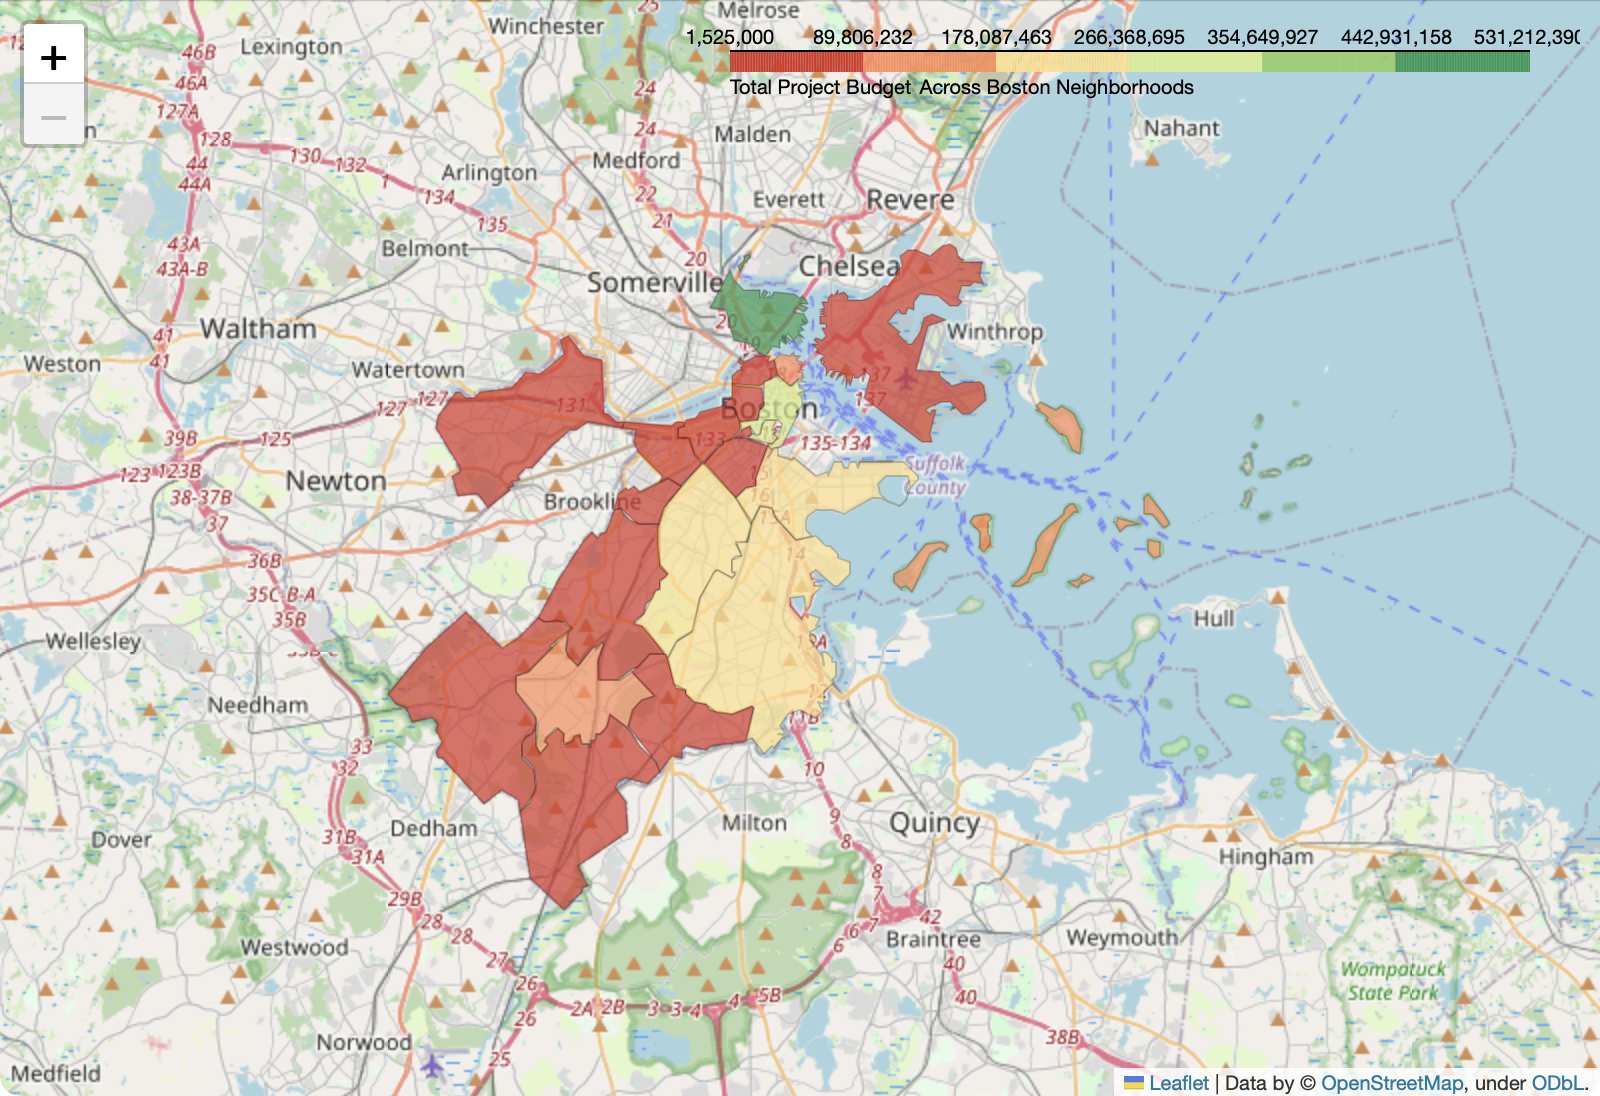

In [319]:
create_map(grouped_budgets, add_text = '')

Image('Total_Project_Budget_map.png')


In [290]:
sqMiles

{'Roslindale': 2.51,
 'Jamaica Plain': 3.94,
 'Mission Hill': 0.55,
 'Bay Village': 0.04,
 'Chinatown': 0.12,
 'North End': 0.2,
 'Roxbury': 3.29,
 'South End': 0.74,
 'Back Bay': 0.62,
 'East Boston': 4.71,
 'Charlestown': 1.36,
 'West End': 0.3,
 'Beacon Hill': 0.31,
 'Downtown/Government Center': 0.62,
 'Fenway-Kenmore': 0.88,
 'West Roxbury': 5.49,
 'Hyde Park': 4.57,
 'Mattapan': 2.11,
 'Dorchester': 7.29,
 'South Boston': 2.25,
 'Harbor Islands': 1.29,
 'Allston/Brighton': 4.44,
 'Allston': 1.56}

## Total Budget Per Square Mile

In [291]:
grouped_budgets['sqMiles'] = grouped_budgets['Neighborhood'].apply(lambda x: sqMiles.get(x))
grouped_budgets

Neighborhood  Total_Project_Budget  sqMiles
2                  Bay Village             1525000.0     0.04
20                    West End             5000000.0     0.30
14                Mission Hill             5242212.0     0.55
11                   Hyde Park             6615000.0     4.57
9               Fenway-Kenmore            12750000.0     0.88
3                  Beacon Hill            34410000.0     0.31
21                West Roxbury            48645000.0     5.49
0             Allston/Brighton            57605000.0     4.44
8                  East Boston            62457890.0     4.71
1                     Back Bay            65442299.0     0.62
12               Jamaica Plain            80782500.0     3.94
19                   South End            83548002.0     0.74
13                    Mattapan            87935000.0     2.11
15                   North End            95445000.0     0.20
16                  Roslindale           102470000.0     2.51
10              Harbor Islands           171778144.0     1.29
18                South Boston           200249965.0     2.25
17                     Roxbury           237308325.0     3.29
6                   Dorchester           239411239.0     7.29
5                    Chinatown           271272172.0     0.12
7   Downtown/Government Center           318415000.0     0.62
4                  Charlestown           531212390.0     1.36

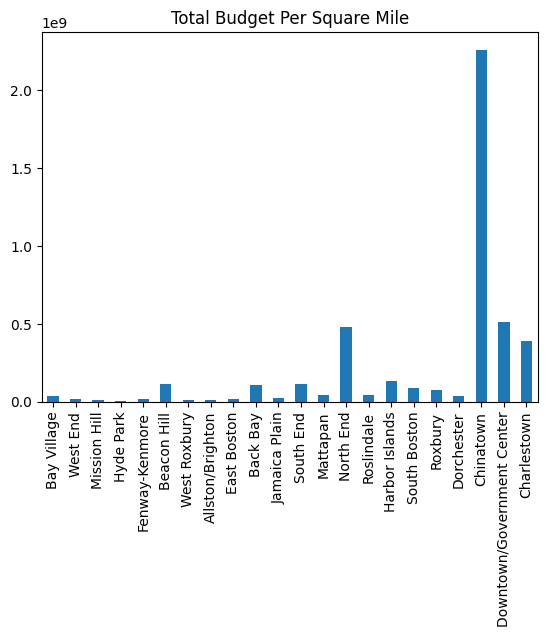

In [302]:
import matplotlib.pyplot as plt
grouped_budgets['Budget_per_sqm'] = grouped_budgets['Total_Project_Budget'] / grouped_budgets['sqMiles']

grouped_budgets['Budget_per_sqm'].plot(kind='bar')
ax = plt.gca()
ax.set_title('Total Budget Per Square Mile')
ax.set_xticklabels(grouped_budgets['Neighborhood'])

plt.show()

In [299]:
grouped_budgets

Neighborhood  Total_Project_Budget  sqMiles  Budget_per_sqm
2                  Bay Village             1525000.0     0.04    3.812500e+07
20                    West End             5000000.0     0.30    1.666667e+07
14                Mission Hill             5242212.0     0.55    9.531295e+06
11                   Hyde Park             6615000.0     4.57    1.447484e+06
9               Fenway-Kenmore            12750000.0     0.88    1.448864e+07
3                  Beacon Hill            34410000.0     0.31    1.110000e+08
21                West Roxbury            48645000.0     5.49    8.860656e+06
0             Allston/Brighton            57605000.0     4.44    1.297410e+07
8                  East Boston            62457890.0     4.71    1.326070e+07
1                     Back Bay            65442299.0     0.62    1.055521e+08
12               Jamaica Plain            80782500.0     3.94    2.050317e+07
19                   South End            83548002.0     0.74    1.129027e+08
13                    Mattapan            87935000.0     2.11    4.167536e+07
15                   North End            95445000.0     0.20    4.772250e+08
16                  Roslindale           102470000.0     2.51    4.082470e+07
10              Harbor Islands           171778144.0     1.29    1.331614e+08
18                South Boston           200249965.0     2.25    8.899998e+07
17                     Roxbury           237308325.0     3.29    7.213019e+07
6                   Dorchester           239411239.0     7.29    3.284105e+07
5                    Chinatown           271272172.0     0.12    2.260601e+09
7   Downtown/Government Center           318415000.0     0.62    5.135726e+08
4                  Charlestown           531212390.0     1.36    3.905973e+08